# **Modele de Machine Learning (ML) - 2**

* **La începutul laboratorului [descărcați arhivă de aici](https://drive.google.com/drive/folders/1MQiKTZw4_I8qaRvRcw_CBB_0dIP-0Ikb?usp=sharing) urmând să dați upload la fișiere în google colaboratory (într-un folder numit `data/`):**
<br>


`data/` <br>
`├── Data2.csv` <br>
`├── Iris.csv` <br>
`├── Mall_Customers.csv` <br>
`└── Social_Network_Ads.csv` <br>

<br>

<!-- Care este subiectul central al acestui laborator? -->
* **În acest laborator vom prezenta modelele de bază din Machine Learning.**

<!--
La ce este util acest subiect ?
Ce rezolva acest subiect?
Cum ne face viata mai usoara?
Ce avem de castigat data il folosim acest concept?
-->

* **Scopul acestui laborator este familiarizarea cu modelele de Machine Learning și dezvoltarea intuiției de a alege un algoritm/model de ML luând în considerare ce fel de date avem și ce problemă dorim să rezolvăm.**


* Pentru exersarea cunoștințelor de ML va recomandăm următorul link în care am aprofundat cunoștințele dobândite în acest laborator: [(**!! OPȚIONAL !!**)](https://colab.research.google.com/drive/1Mn_Md0I3Fjs3V7d8lqcXm9rmvqhAgWVh?usp=sharing)

* Recomandare de curs pentru începători: [(**!! OPȚIONAL !!**)](https://www.udemy.com/share/101WfW3@Ce1GZAE1fhB9FW6zaESHkQNfABhSQPifaVgywm7tACJ8vv2O5luWrkbIeqX4jW4l/)

# Cuprins

I. **Workflow**

II. **Învățarea supervizată**
  - **Clasificare**
      - Logistic Regresion
      - Decision Tree
      - Support Vector Machine (SVM)
      - Ensemble Methods:
        - Random Forest
        - XGBoost (**OPȚIONAL**)
      - K-Nearest Neighbors (K-NN) (**OPȚIONAL**)
      - Kernel SVM (**OPȚIONAL**)

III. **Învățarea nesupervizată**
  - **Clusterizare**
      - K-Means
      
IV. **Exerciții**

# **I. Workflow**

Metodologia generală de abordare a problemelor de  ML și pașii sistematici prin care se alege un model de ML.


> 1. **Analiza datelor ce vor fi folosite pentru antrenare**
> 2. **Plotarea datelor pentru o înțelegere mai bună vizual + corelațiile între date**
> 3. **Definirea problemei care trebuie rezolvată**
> 4. **Potrivirea datelor și a problemei cu un model de ML**
  - **Învățarea supervizată**
    - **Regresie**
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Multiple Linear Regression (**!! OPȚIONAL !!**)
        - Polynomial Regression (**!! OPȚIONAL !!**)
    - **Clasificare**
        - Logistic Regresion
        - Decision Tree Classification
        - Support Vector Machine (SVM)
        - Ensemble Models:
          - Random Forest Classification
          - XGBoost (**!! OPȚIONAL !!**)
        - K-Nearest Neighbors (K-NN) (**!! OPȚIONAL !!**)
        - Kernel SVM (**!! OPȚIONAL !!**)
        - Artificial Neural Network (ANN) (**!! OPȚIONAL !!**)

  - **Învățarea nesupervizată**
    - **Clusterizare**
        - K-Means

> 5. **Preprocesarea datelor:**
> 6. **Split date antrenare + validare + testare:**

  1. 70% antrenare, 15% validare, 15% testare
  2. 80% antrenare, 10% validare, 10% testare
  3. 60% antrenare, 20% validare, 20% testare
  
> 7. **Antrenarea Modelului**
> 8. **Folosirea a cel puțin 2 metrici de evaluare pe setul de antrenare și cel de validare (ex: accuracy, recall) pentru a vedea cât de bine performează modelul ales**
> 9. **Predicțiile modelului ales pe setul de testare**
> 10. **Analiză prin metodele de evaluare cunoscute pe modelul antrenat cu rezultatele prezise de model și valorile reale cunoscute.**
  * Le vom studia la laboratorul de **Evaluări și Optimizari ale Modelelor de ML**


<center>
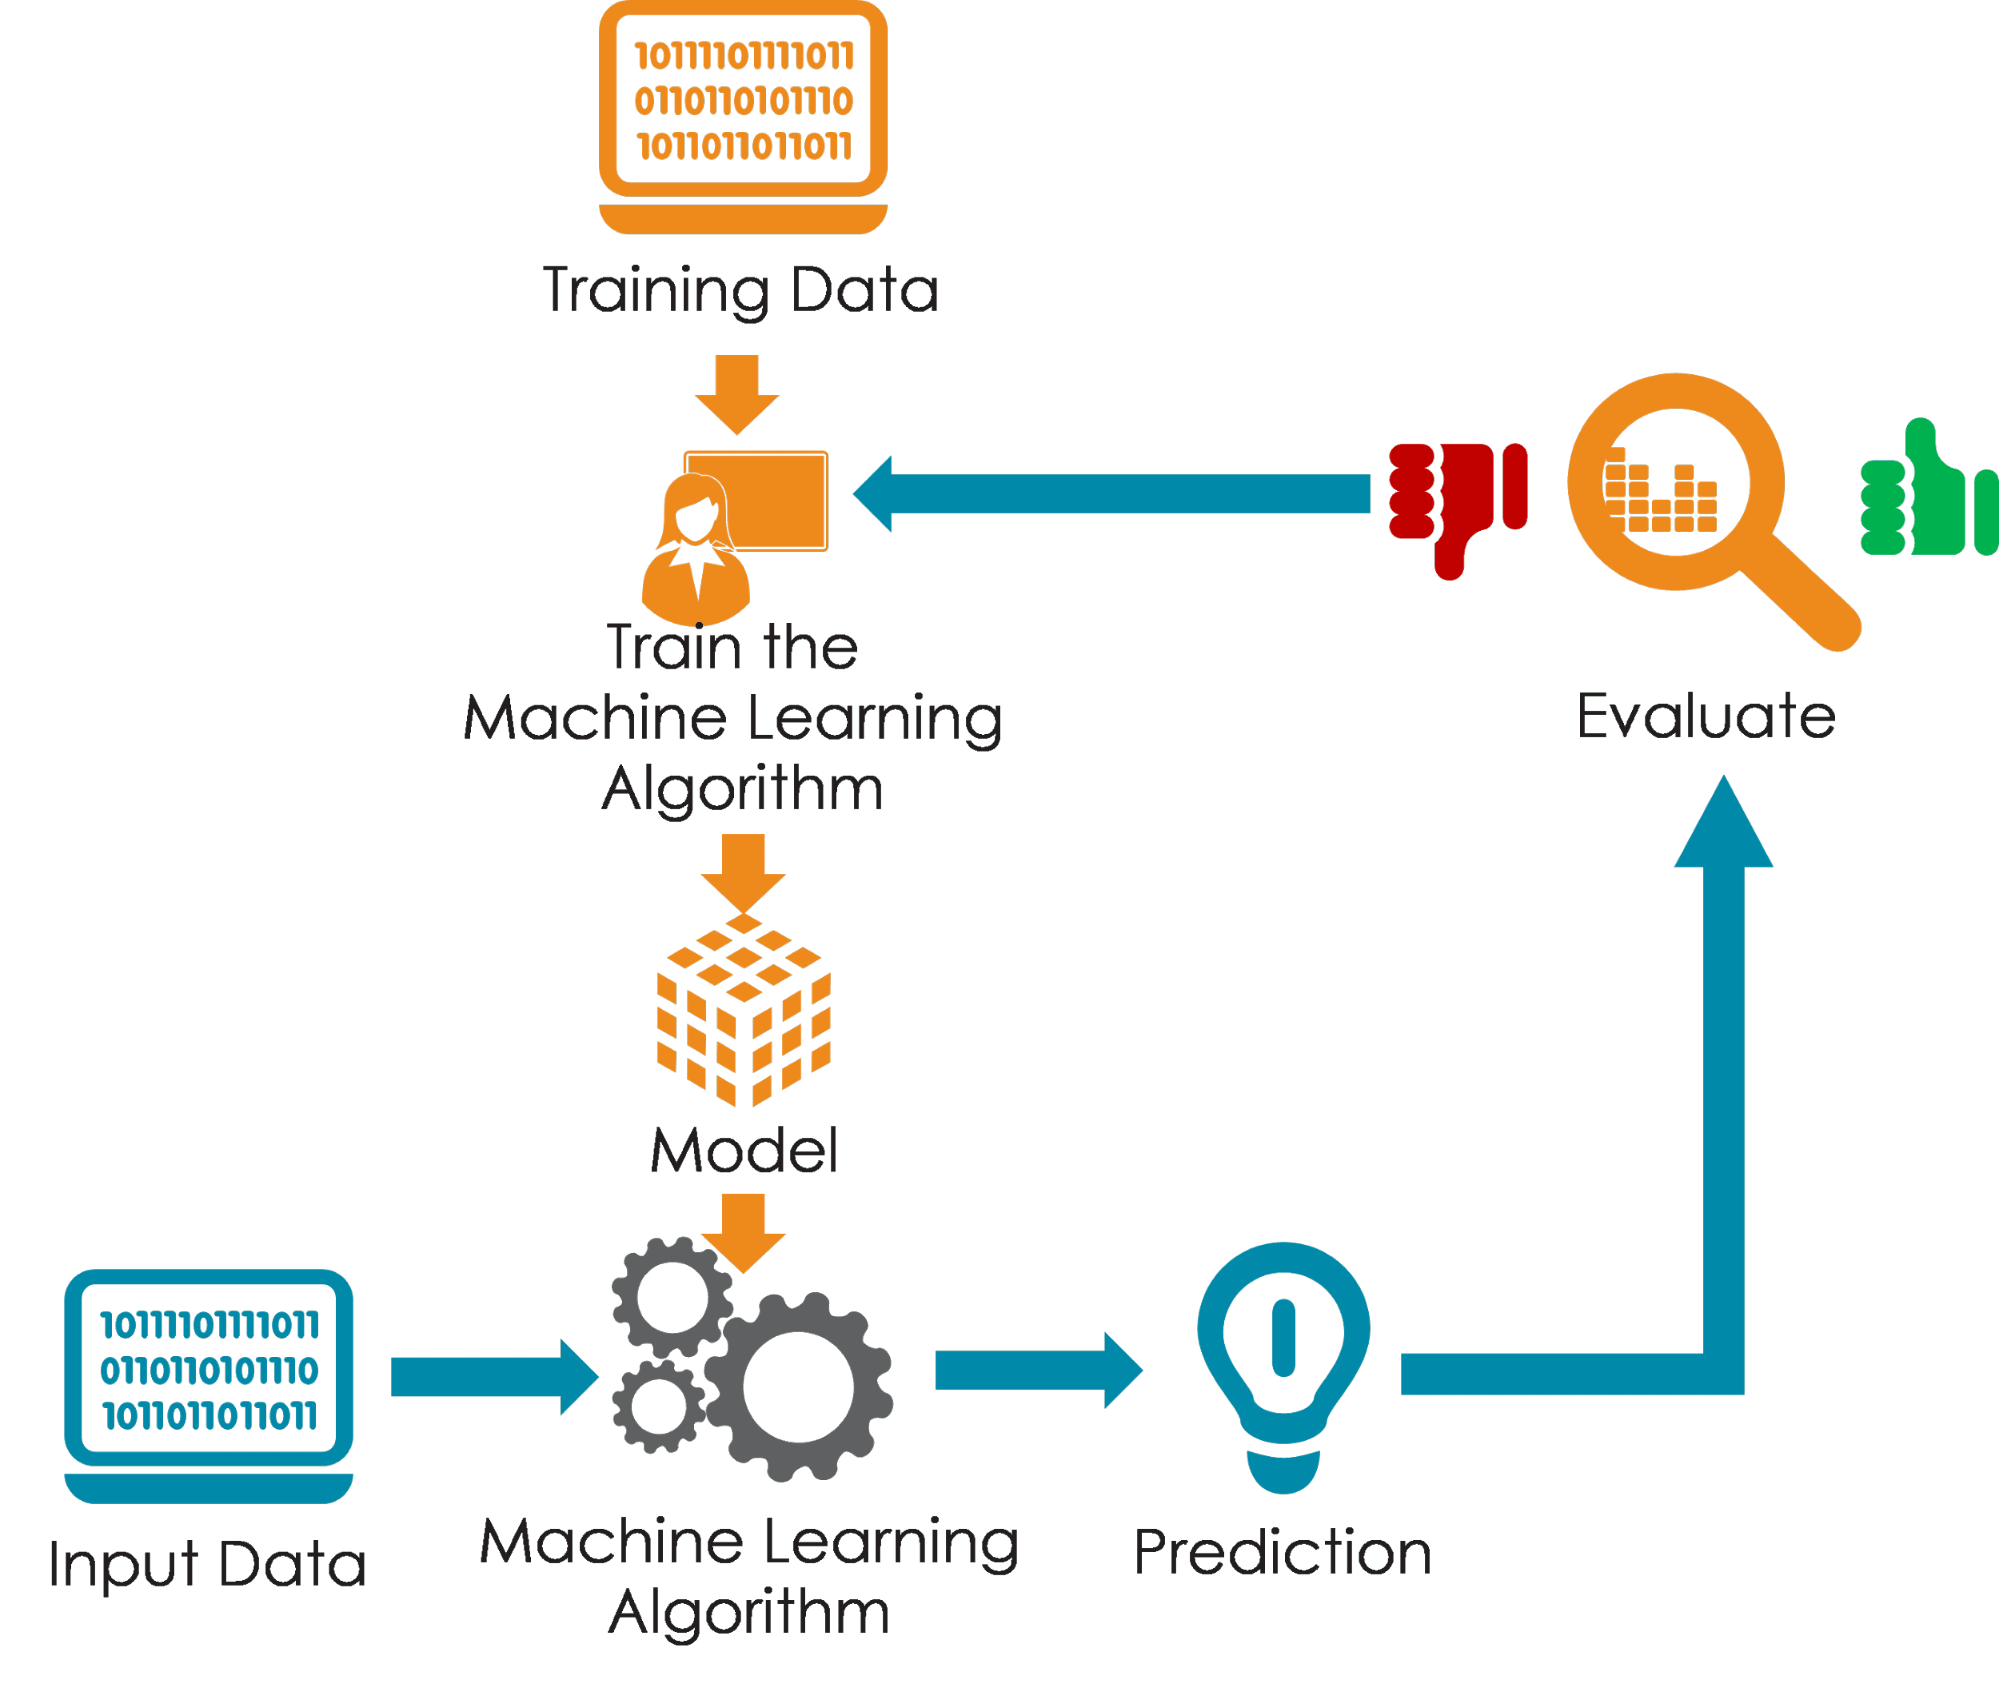
</center>

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    ConfusionMatrixDisplay
)
from typing import Callable

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
RANDOM_STATE = 42

In [30]:
# Importurile pentru toate modelele folosite (pentru clasificare)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

<br>
<br>

# II. Învățarea Supervizată

## 2. Clasificare

### Funcții ajutătoare

In [31]:
def plot_boundary(
    clf: Callable,
    X: np.ndarray,
    y: np.ndarray,
    scaler: Callable,
    title: str,
    xlabel: str = 'Age',
    ylabel: str = 'Estimated Salary',
    c: str = 'train',
    alpha: float = 0.5,
    step: float = 0.01,
    ax = None
):
    """
    Helper function for plotting the decision boundary for a trained classifier

    :param clf: `Classifier` - The trained model/estimator
    :param X: Input data (assuming normalized input data)
    :param y: The real labels for the input data
    :param scaler: The scaler used for normalizing the original training data
    :param title: The title for the plot
    :param xlabel: The label for the x-axis
    :param ylabel: The label for the y-axis
    :param c: The color mode (either `train` or `test`)
    :param alpha: Opacity for decision areas
    :param step: Discretization step for the input space
    :param ax: If passed, the axis on which the plot should be created
    """

    # If no ax is passed, then create one for a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4.5))

        # Flag for showing the plot and its legend
        show = True
    else:
        show = False

    colors = ('red', 'green') if c == 'train' else ('tab:blue', 'tab:orange')
    cmap = ListedColormap(colors)

    # Get the input space bounds
    start_x1, start_x2 = X.min(axis=0)
    stop_x1,  stop_x2  = X.max(axis=0)

    # Create the 2D coordinates
    xx, yy = np.meshgrid(np.arange(start=start_x1 * 1.2, stop=stop_x1 * 1.2, step=step),
                         np.arange(start=start_x2 * 1.2, stop=stop_x2 * 1.2, step=step))

    # Reshape the whole input space into 2D array
    xy = np.array([xx.ravel(), yy.ravel()]).T

    # Make predictions for the entire input space
    y_pred = clf.predict(xy).reshape(xx.shape)

    # Rescale the coordinates to match the original magnitude of the data
    xx = scaler.inverse_transform(xy)[:, 0].reshape(xx.shape)
    yy = scaler.inverse_transform(xy)[:, 1].reshape(yy.shape)

    # Plot the contour of the decision boundaries
    ax.contourf(xx, yy, y_pred, alpha=alpha, cmap=cmap)

    # Un-normalize the input data
    X_scaled = scaler.inverse_transform(X)

    # Plot the samples and color them according to the correct label (not the predicted one)
    for i, j in enumerate(np.unique(y)):
        ax.scatter(X_scaled[y==j, 0], X_scaled[y==j, 1], c=colors[i], label=j,
                    s=60, edgecolors='0.2', linewidth=0.7)

    ax.axis(xmin=xx.min(), xmax=xx.max())
    ax.axis(ymin=yy.min(), ymax=yy.max())

    ax.set_title(title, fontsize=14)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    if show:
        ax.legend(fontsize=13)
        plt.show()

In [32]:
def plot_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray, labels: list, clf_name: str):

    # Get the confusion matrix for the current set of predictions
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.show()

    print(f"{clf_name} accuracy: {accuracy_score(y_test, y_pred):.4f}")

<br>
<br>
<br>

### Pregătirea setului de date

In [33]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

### Teorie


* Acest tip de model statistic (cunoscut și sub denumirea de model logit) este adesea folosit pentru clasificare și analize predictive. Regresia logistică estimează probabilitatea de producere a unui eveniment, cum ar fi votat sau nu a votat, bazată pe un set dat de variabile independente.


* Deoarece rezultatul este o probabilitate, variabila dependentă este cuprinsă între 0 și 1. În regresia logistică, se aplică o transformare logit asupra cotelor de șansă - adică probabilitatea de succes împărțită la probabilitatea de eșec.



* Mai multe explicații găsiți aici:
  * https://www.youtube.com/watch?v=yIYKR4sgzI8

<center>
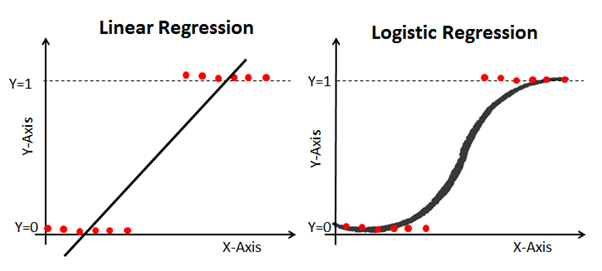
</center>

**Avantaje**:
- Interpretabilitate: Rezultatele sunt ușor interpretabile, iar coeficienții pot fi analizați pentru a înțelege contribuția fiecărei variabile la predicție.
- Nu face presupuneri despre distribuțiile claselor în spațiul caracteristicilor.


**Dezavantaje**:
- Construiește limite liniare.
- Presupune în mod inerent o dependență liniară între variabila dependentă și variabilele independente.

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=RANDOM_STATE)
logistic_clf.fit(X_train, y_train)
y_pred_logistic = logistic_clf.predict(X_test)

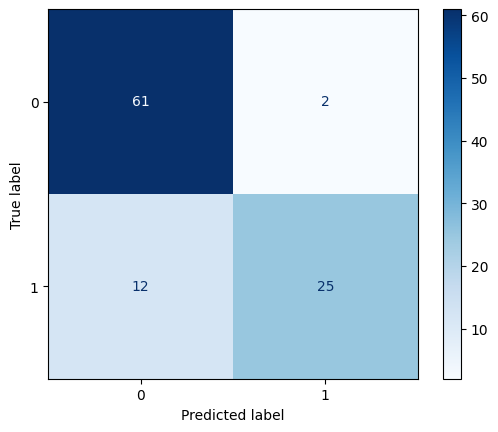

Logistic Regression accuracy: 0.8600


In [37]:
plot_confusion_matrix(y_test, y_pred_logistic, logistic_clf.classes_, 'Logistic Regression')

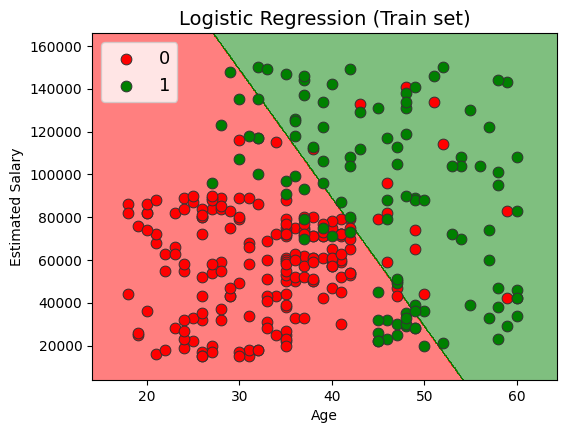

CPU times: total: 93.8 ms
Wall time: 227 ms


In [38]:
%time plot_boundary(logistic_clf, X_train, y_train, scaler, 'Logistic Regression (Train set)')

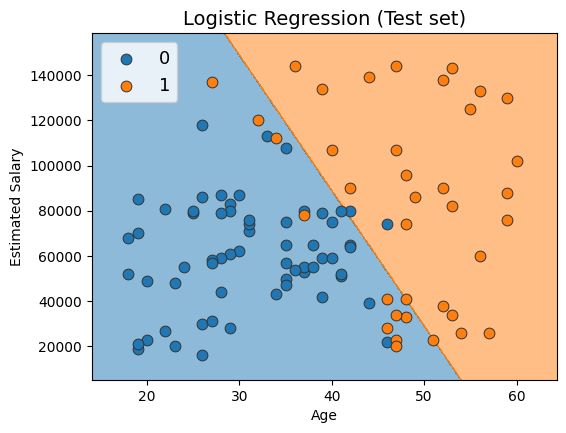

CPU times: total: 109 ms
Wall time: 164 ms


In [39]:
%time plot_boundary(logistic_clf, X_test, y_test, scaler, 'Logistic Regression (Test set)', c='test')

# Decision Tree

### Teorie

* Un **arbore de decizie** este un model de învățare supervizată non-parametric, ce poate fi folosit atât pentru clasificare cât și pentru regresie. Scopul este acela de a construi un model pentru prezicerea unei variabile țintă prin stabilirea unui set de reguli de decizie simple deduse pe baza caracteristicilor datelor de antrenare. Un arbore de decizie poate fi văzut ca o aproximare constantă pe părți.


* Arborele de decizie are o structură ierarhică, iar construirea acestuia presupune o strategie de tipul divide et impera, cu o abordare lacomă (greedy) în identificarea punctului optim de ramificare a arborelui. Prin divizarea recursivă a setului de date în subgrupuri pe baza caracteristicilor semnificative, arborele formează o structură ierarhică de decizii. Nodurile reprezintă decizii, iar ramurile indică rezultate posibile. Această abordare oferă o interpretare intuitivă a procesului de decizie, facilitând analiza și înțelegerea modelului.


* Terminologie:
    - **Root node**: baza arborelui de decizie.
    - **Splitting**: procesul de divizare a unui nod în subgrupuri, bazat pe caracteristici specifice, pentru a continua construcția arborelui.
    - **Decision Node**: Punct în arborele decizional unde se ia o decizie, având ramuri care duc la alte noduri sau frunze.
    - **Leaf Node**: Un nod care nu este divizat în continuare și reprezintă o predicție sau o clasificare.
    - **Prunning**: Procesul de eliminare a anumitor ramuri sau noduri ale arborelui pentru a preveni supraînvățarea și a îmbunătăți generalizarea.
    - **Branch**: O conexiune între noduri reprezentând calea de la un nod la altul.
    

* În construcția arborelui decizional, alegerea caracteristicii pentru împărțirea unui nod este crucială. Acest proces este cunoscut sub numele de selecție de atribute și se folosește de o măsură pentru a evalua eficiența împărțirii unui nod (încercând să maximizeze omogenitatea grupurilor rezultate după împărțire). Două astfel de măsuri sunt:
    - **Information Gain**
    - **Gini Index**


* Mai multe explicații găsiți aici:
  * https://www.geeksforgeeks.org/decision-tree-introduction-example/?ref=gcse
  * https://www.youtube.com/watch?v=ZVR2Way4nwQ

<center>
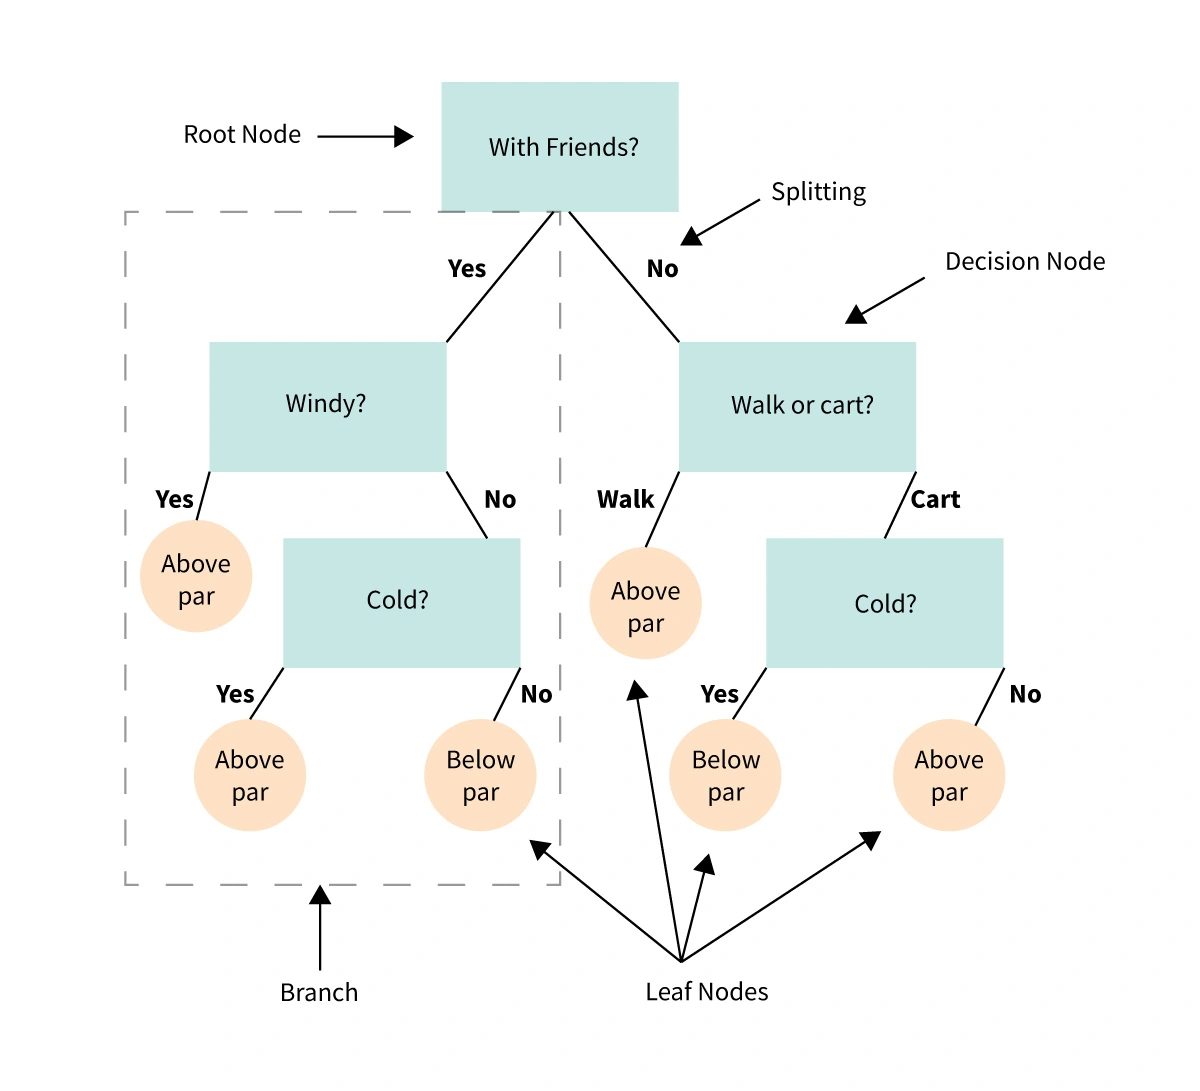
</center>

**Avantaje**:
- Ușor de interpretat.
- Necesită puțină (sau deloc) pregătire a datelor.
- Flexibil.


**Dezavantaje**:
- Înclinat spre overfitting.
- Estimatori cu varianță mare: Mici variații în date pot produce un arbore de decizie foarte diferit.

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
decision_tree_clf.fit(X_train, y_train)
y_pred_tree = decision_tree_clf.predict(X_test)

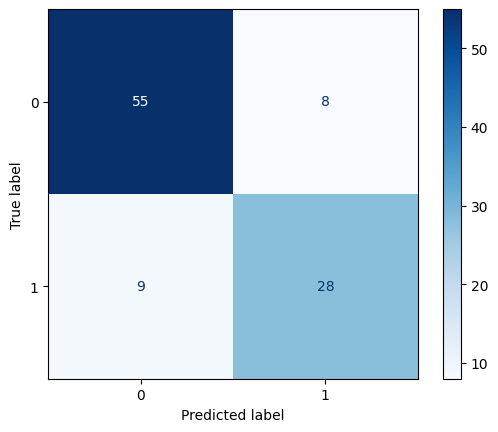

Decision Tree accuracy: 0.8300


In [41]:
plot_confusion_matrix(y_test, y_pred_tree, decision_tree_clf.classes_, 'Decision Tree')

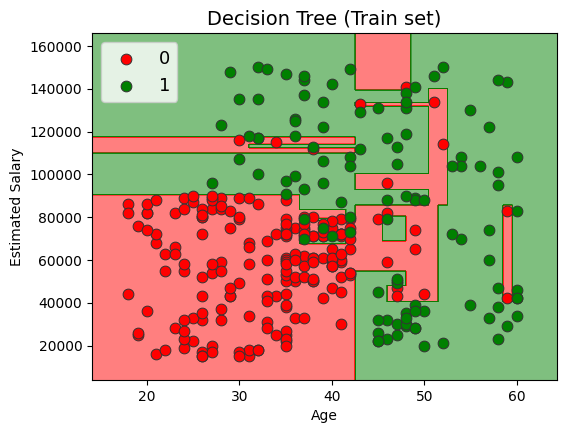

CPU times: total: 125 ms
Wall time: 184 ms


In [42]:
%time plot_boundary(decision_tree_clf, X_train, y_train, scaler, 'Decision Tree (Train set)')

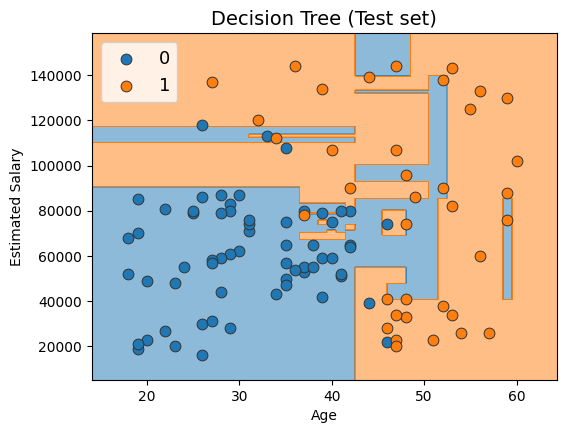

CPU times: total: 125 ms
Wall time: 173 ms


In [43]:
%time plot_boundary(decision_tree_clf, X_test, y_test, scaler, 'Decision Tree (Test set)', c='test')

# Support Vector Machine (SVM)

### Teorie

* Support Vector Machine (SVM) este un algoritm de învățare automată supervizat folosit atât pentru clasificare, regresie, cât și pentru detecția valorilor extreme/aberante (outliers). Obiectivul algoritmului SVM este de a găsi un hiperplan într-un spațiu N-dimensional care clasifică distinct punctele de date. Dimensiunea hiperplanului depinde de numărul de caracteristici. Dacă numărul de caracteristici de intrare este egal cu 2, atunci hiperplanul este doar o linie. Dacă numărul de caracteristici de intrare este egal cu trei, atunci hiperplanul devine un plan 2-D.


* O alegere rezonabilă pentru cel mai bun hiperplan este cea care reprezintă cea mai mare separare sau marjă între cele două clase.


* SVM este robust la valori aberante (outliers).


* Avantajele SVM:
    - Eficient în spații cu dimensiuni ridicate.
    - Folosește un subset de puncte din setul de antrenare în funcția de decizie (numite vectori suport), fiind astfel eficient din punct de vedere al memoriei.
    - Versatilă: diferite funcții Kernel pot fi specificate pentru funcția de decizie.


* Mai multe explicații găsiți aici:
  * https://www.youtube.com/watch?v=_PwhiWxHK8o
  * https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

<center>
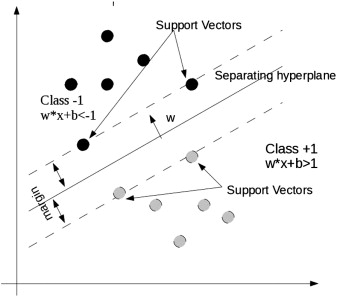
</center>

**Avantaje**
- SVM funcționează relativ bine atunci când există un hiperplan clar de separare între clase.
- Eficient din punct de vedere al consumului de memorie.

**Dezavantaje**
- Performanțe mai slabe atunci când clasele țintă se suprapun.
- Deoarece clasificatorul cu vectori de suport funcționează prin plasarea punctelor de date deasupra și sub hiperplanul de clasificare, nu există o explicație probabilistică pentru clasificare.
- Algoritmul SVM nu este potrivit pentru seturi de date mari.

In [44]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear', random_state=RANDOM_STATE)
svc_clf.fit(X_test, y_test)
y_pred_svc = svc_clf.predict(X_test)

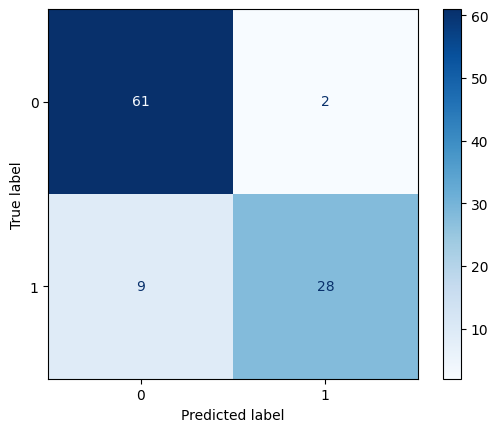

SVM accuracy: 0.8900


In [45]:
plot_confusion_matrix(y_test, y_pred_svc, svc_clf.classes_, 'SVM')

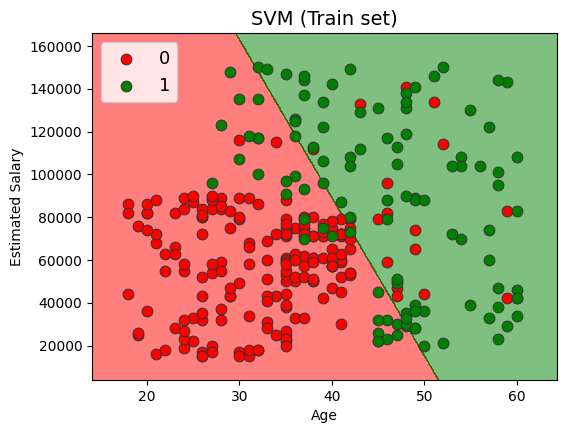

CPU times: total: 266 ms
Wall time: 302 ms


In [46]:
%time plot_boundary(svc_clf, X_train, y_train, scaler, 'SVM (Train set)')

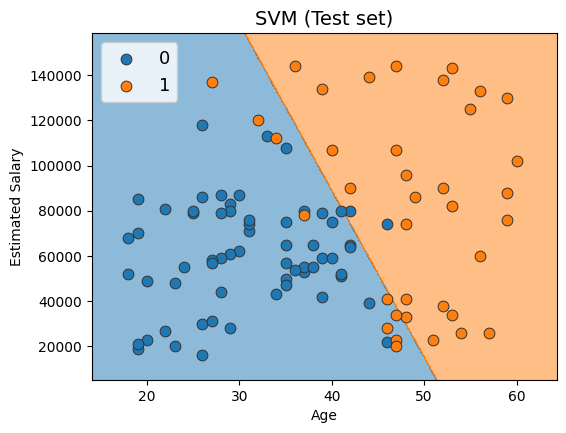

CPU times: total: 234 ms
Wall time: 285 ms


In [47]:
%time plot_boundary(svc_clf, X_test, y_test, scaler, 'SVM (Test set)', c='test')

## Ensemble methods

### Teorie

* **Ensemble** înseamnă combinarea mai multor modele. Astfel, o colecție de modele este folosită pentru a face predicții, mai degrabă decât un model individual.


* Presupune două familii de metode:

  * **Bagging** – implică antrenarea mai multor modele de bază pe eșantioane de date create prin bootstrap (alegerea unui subset de date) și apoi agregarea predicțiilor acestora pentru a obține un model final mai robust și mai stabil. Fiecare model este antrenat indepdendent, iar rezultatul final se bazează pe votul majoritar după combinarea rezultatelor tuturor modelelor. De exemplu, **Random Forest**.

  * **Boosting** – o tehnică în care modele slabe (weak learners) sunt antrenate în mod secvențial pentru a corecta erorile modelelor anterioare. Fiecare model este ponderat în funcție de performanța sa, astfel încât modelele ulterioare să se concentreze mai mult pe exemplele greșite. Prin acest proces iterativ, se creează un model puternic care îmbunătățește performanța generală a ansamblului. De exemplu, **ADA BOOST, XG BOOST**.

<center>
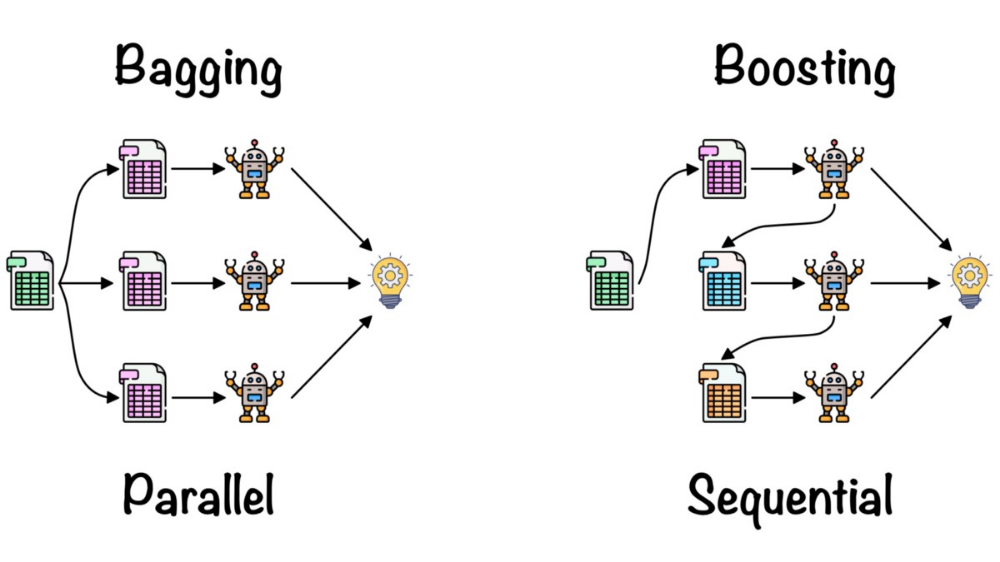
</center>

<center>
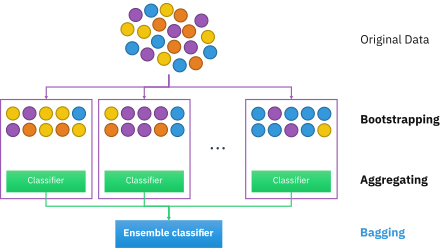
</center>

## Random Forest

### Teorie

* Pădurea aleatoare (Random Forest) este un algoritm de învățare automată frecvent utilizat care combină rezultatele mai multor arbori de decizie pentru a obține un singur rezultat.


* Pași implicați în algoritmul Random Forest:
    - Selectarea unor eșantioane aleatoare din setul de date de antranare - n eșantioane având un număr de k atribute.
    - Construirea unui arbore de decizie pentru fiecare subset de date.
    - Folosirea tutoror arborilor construiți pentru generarea unui set de predicții.
    - Rezultatul final este considerat pe baza votului majoritar sau a mediei pentru clasificare și, respectiv, regresie.


* Mai multe explicații găsiți aici:
  * https://www.youtube.com/watch?v=ZVR2Way4nwQ
  * https://www.youtube.com/watch?v=eM4uJ6XGnSM

<center>
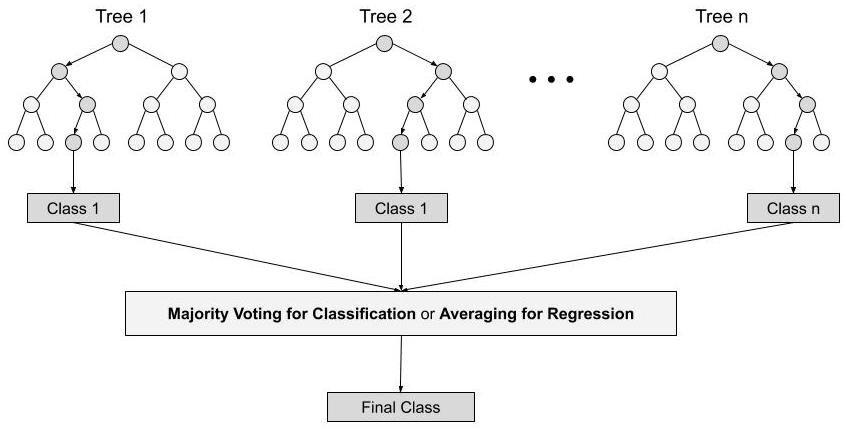
</center>

**Avantaje**
- Performant într-un număr mare de cazuri.
- Flexibilitate.
- Risc scăzut de overfitting.

**Dezavantaje**
- Timp destul de ridicat de construcție a arborilor.
- Consum crescut de resurse.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

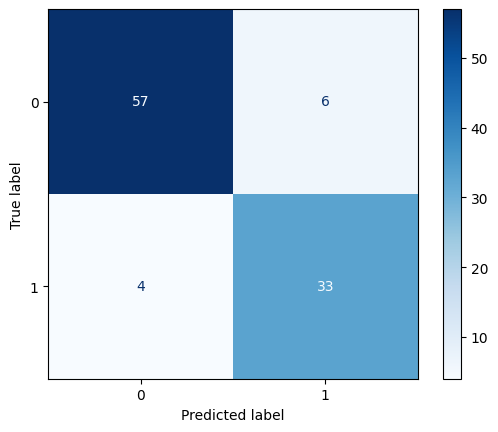

Random Forest accuracy: 0.9000


In [49]:
plot_confusion_matrix(y_test, y_pred_rf, rf_clf.classes_, 'Random Forest')

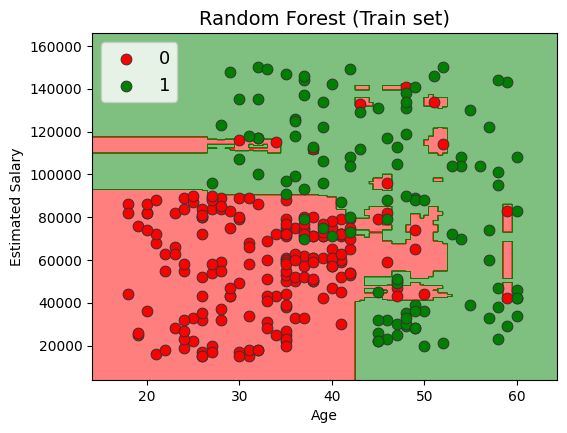

CPU times: total: 312 ms
Wall time: 386 ms


In [50]:
%time plot_boundary(rf_clf, X_train, y_train, scaler, 'Random Forest (Train set)')

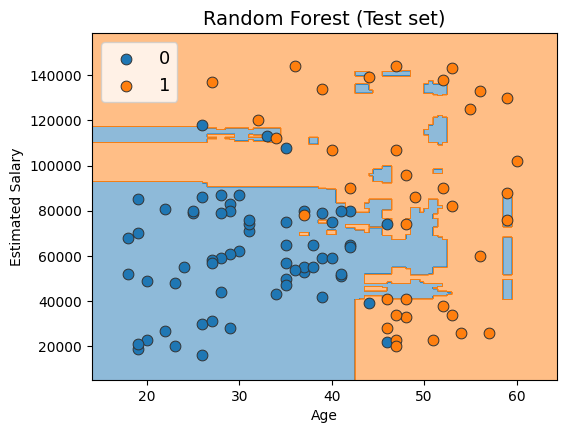

CPU times: total: 297 ms
Wall time: 356 ms


In [51]:
%time plot_boundary(rf_clf, X_test, y_test, scaler, 'Random Forest (Test set)', c='test')

## XGBoost

### Teorie

* XGBoost (Extreme Gradient Boosting) este o abordare scalabilă și distribuită de învățare automată bazată pe gradient-boosted decision trees (GBDT).

<center>
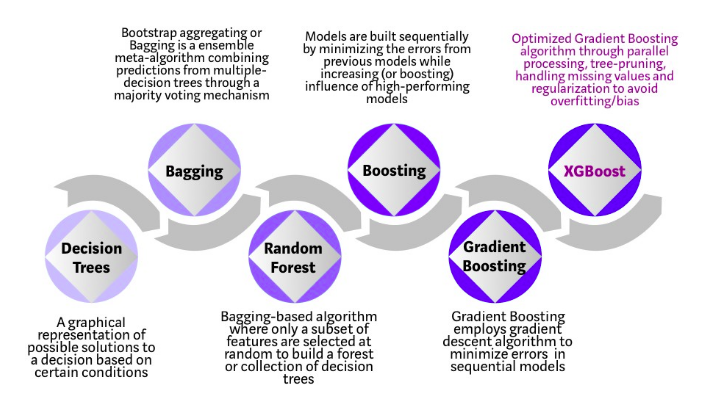
</center>

* **Gradient Boosting**
  * Este un algoritm popular de amplificare (boosting). În acest algoritm, fiecare predictor corectează eroarea predecesorului său. Spre deosebire de **Adaboost**, ponderile instanțelor de antrenament nu sunt modificate, în schimb, fiecare predictor este antrenat folosind erorile reziduale ale predecesorului său drept etichete.
  

* XGBoost oferă regularizare. Penalizează modelele care tind spre o modelare exagerată (prea exactă) a datelor de antrenare (overfit) folosind regularizarea de tipul L1/L2 (Lasso/Ridge).


* XGBoost poate gestiona algoritmul de cantități ponderate pentru cuantilă (*Weighted Quantile Sketch*). Acest algoritm permite căutarea eficientă și distribuită de puncte de împărțire optime a setului de date.


* XGBoost are, de asemenea, o structură de blocuri pentru învățarea paralelă. Face ușoară scalarea pe mașini multicore sau clustere. De asemenea, este cache-aware, ajutând la reducerea utilizării memoriei în antrenarea modelelor pe seturi de date mari.


* Caracteristici cheie XGBoost:
    - Regularizare
    - O abordare unică pentru construcția arborelui de decizie
    - Algoritm Greedy aproximativ
    - Weighted Quantile Sketch
    - Sparsity-Aware Split Finding
    - Învățare paralelă
    - Cache-Aware Access


* Mai multe informații găsiți aici:
  * https://www.geeksforgeeks.org/xgboost/?ref=gcse
  * https://www.youtube.com/watch?v=kho6oANGu_A

<center>
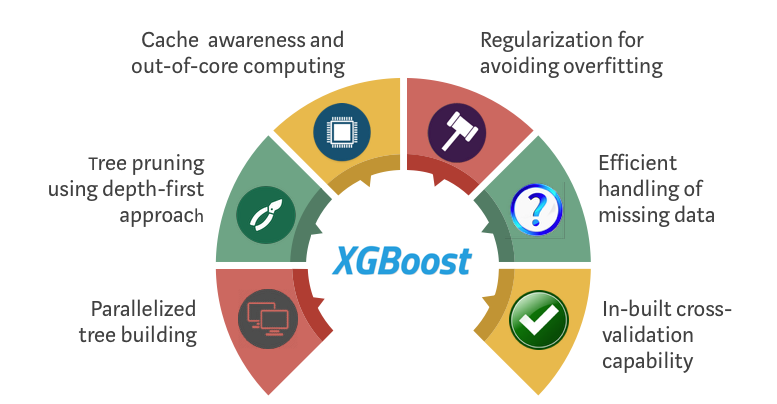
</center>

**Avantaje**
- Similar cu Random Forest, nu necesită scalarea atributelor.
- Performant, scalabil și destul de interpretabil.

**Dezavantaje**
- Complex computațional și memory-intensive.
- Poate întâmpina probleme de overfitting în special pentru seturi mici de date.

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

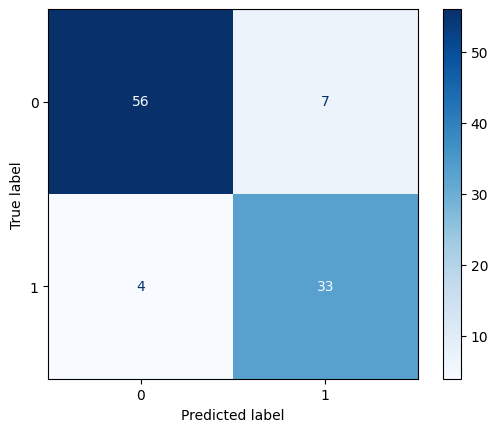

XGBoost accuracy: 0.8900


In [54]:
plot_confusion_matrix(y_test, y_pred_xgb, xgb_clf.classes_, 'XGBoost')

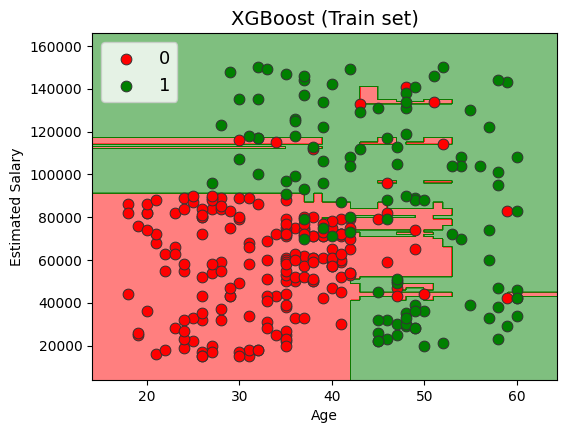

CPU times: total: 1.75 s
Wall time: 251 ms


In [55]:
%time plot_boundary(xgb_clf, X_train, y_train, scaler, 'XGBoost (Train set)')

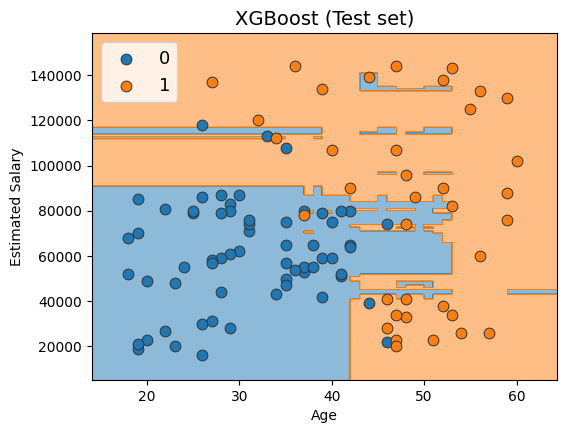

CPU times: total: 1.59 s
Wall time: 256 ms


In [56]:
%time plot_boundary(xgb_clf, X_test, y_test, scaler, 'XGBoost (Test set)', c='test')

# (Opțional) K-Nearest Neighbours (K-NN)

### Teorie

* Algoritmul k-nearest neighbors, cunoscut și sub denumirea de KNN sau k-NN, este un clasificator de învățare supervizată, non-parametric, care utilizează proximitatea pentru a face clasificări sau predicții despre gruparea unui punct de date. Deși poate fi folosit pentru probleme de regresie sau clasificare, este în mod obișnuit utilizat ca algoritm de clasificare, bazându-se pe presupunerea că punctele similare pot fi găsite în apropiere unul de altul.


* Scopul algoritmului k-nearest neighbor este să identifice cei mai apropiați **k** vecini ai unui punct, astfel încât să putem atribui o etichetă (o clasă) acelui punct. Pentru a realiza acest lucru, KNN are câteva cerințe:
    - O metrică de distanță.
    - Definirea lui K


* Mai multe explicații găsiți aici:
  * https://www.youtube.com/watch?v=HVXime0nQeI

<center>
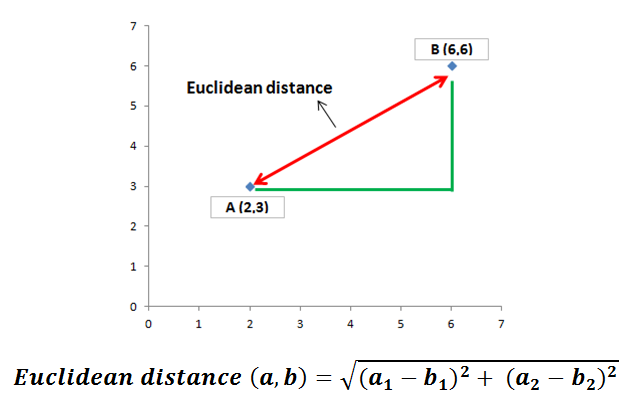
</center>

<center>
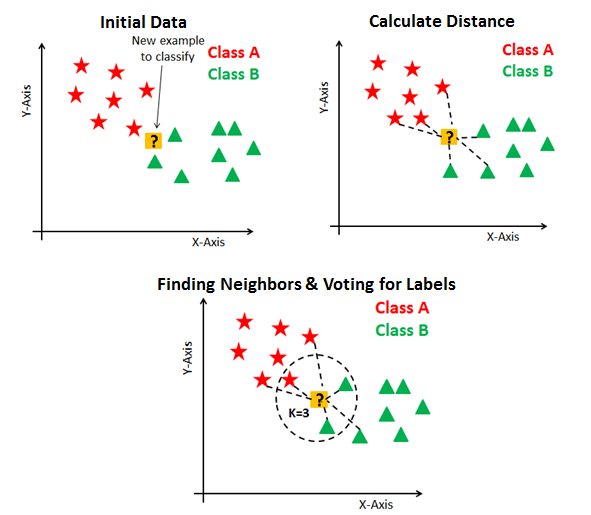
</center>

**Avantaje**
- Ușor de implementat.
- Puțini hiperparametrii.

**Dezavantaje**
- Scalabilitate slabă.
- Curse of dimensionality.
- Predispus la overfitting.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

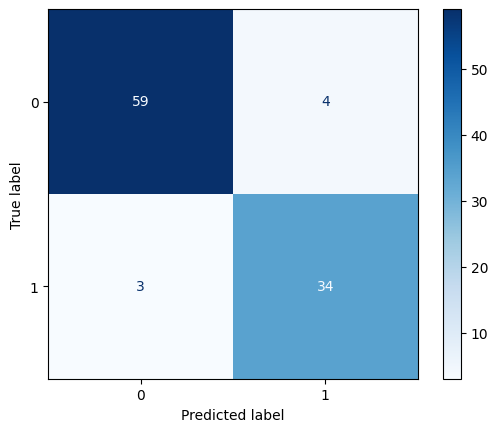

K-NN accuracy: 0.9300


In [58]:
plot_confusion_matrix(y_test, y_pred_knn, knn_clf.classes_, 'K-NN')

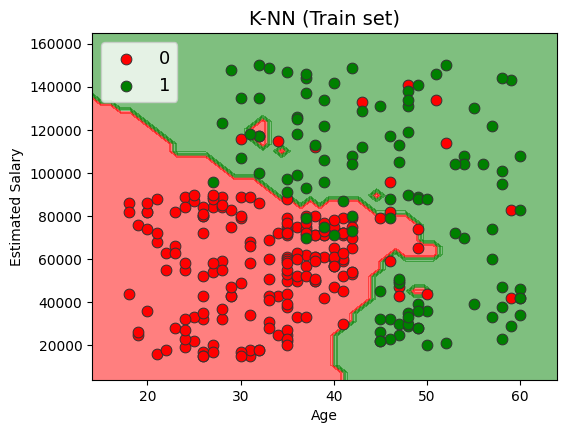

CPU times: total: 156 ms
Wall time: 229 ms


In [59]:
%time plot_boundary(knn_clf, X_train, y_train, scaler, 'K-NN (Train set)', step=0.1)

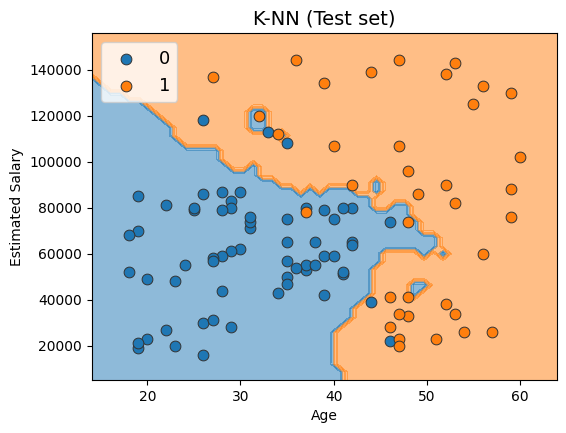

CPU times: total: 93.8 ms
Wall time: 229 ms


In [60]:
%time plot_boundary(knn_clf, X_test, y_test, scaler, 'K-NN (Test set)', c='test', step=0.1)

# Comparare modele bazate pe arbori

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [62]:
df = pd.read_csv('Data2.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [63]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,
                                                    random_state=RANDOM_STATE)

In [65]:
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                                max_features='sqrt', random_state=RANDOM_STATE)

In [66]:
xgb_clf = xgb_clf.fit(X_train, y_train)
dt_clf = dt_clf.fit(X_train, y_train)
rf_clf = rf_clf.fit(X_train, y_train)

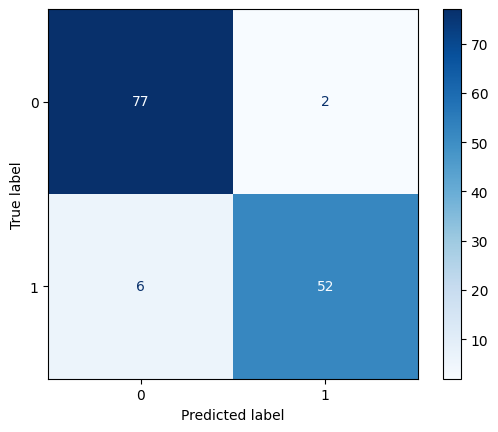

XGBoost accuracy: 0.9416


In [67]:
plot_confusion_matrix(y_test, xgb_clf.predict(X_test), xgb_clf.classes_, 'XGBoost')

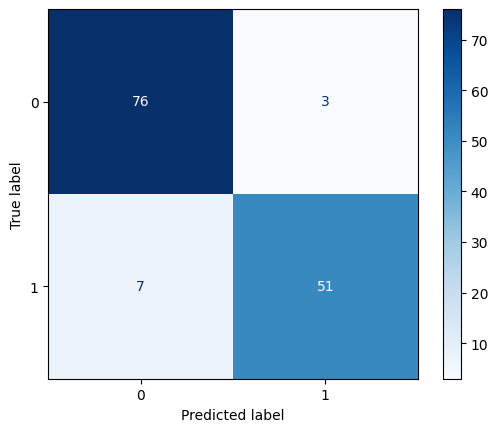

Decision Tree accuracy: 0.9270


In [68]:
plot_confusion_matrix(y_test, dt_clf.predict(X_test), dt_clf.classes_, 'Decision Tree')

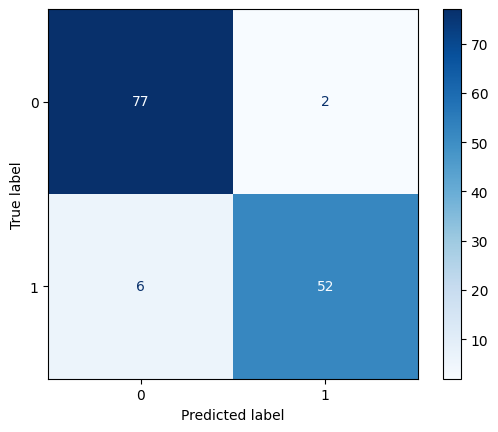

Random Forest accuracy: 0.9416


In [69]:
plot_confusion_matrix(y_test, rf_clf.predict(X_test), rf_clf.classes_, 'Random Forest')

In [70]:
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                                max_features='sqrt', random_state=RANDOM_STATE)

estimators = [xgb_clf, dt_clf, rf_clf]
names = ['XGBoost', 'Decision Tree', 'Random Forest']

for estimator, name in zip(estimators, names):
    scores = cross_val_score(estimator=estimator, X=X, y=y_encoded, cv=7)
    print(name)
    print(f"Accuracy: {scores.mean()*100:.2f} %")
    print(f"Std: {scores.std()*100:.2f} %\n")

XGBoost
Accuracy: 96.49 %
Std: 1.87 %

Decision Tree
Accuracy: 93.86 %
Std: 2.23 %

Random Forest
Accuracy: 96.20 %
Std: 2.42 %



# (Opțional) Kernel SVM

### Teorie


* Funcția de nucleu (kernel) este o metodă utilizată pentru a lua datele de intrare și a le transforma în forma necesară pentru procesare. "Nucleu" este folosit datorită unui set de funcții matematice utilizate în SVM.


* Funcția de nucleu transformă în general setul de date astfel încât o suprafață de decizie non-liniară să poată fi transformată într-o ecuație liniară într-un număr mai mare de spații dimensionale.


* Un nucleu ajută la formarea hiperplanului în dimensiunea superioară fără a crește complexitatea.


* Kernel-urile sunt o modalitate de a rezolva probleme neliniare cu ajutorul clasificatorilor liniari. Această este cunoscută că metodă trucului nucleului (*kernel trick*). Funcțiile nucleului sunt utilizate că parametri în codurile SVM. Ele ajută la determinarea formei hiperplanului și a limitei de decizie.


* Exemple de kernel-uri:
    - **Linear kernel**
$$
K(x_1, x_2) = x_1.x_2
$$

    - **Polynomial kernel**
$$ K(x_1, x_2) = \left(\gamma x_1.x_2 + c\right)^d $$
$$ d - \text{gradul polinomului} $$
        
    - **Sigmoid kernel**
$$ K(x_1, x_2) = \tanh(\gamma x_1.x_2 + c) $$
        
    - **RBF kernel**
$$ K(x_1, x_2) = \exp(-\gamma\left\| x_1 - x_2 \right\|^2) $$


* Mai multe explicații se pot găsi aici:
  * https://www.youtube.com/watch?v=wqSTBCguVyU

In [71]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

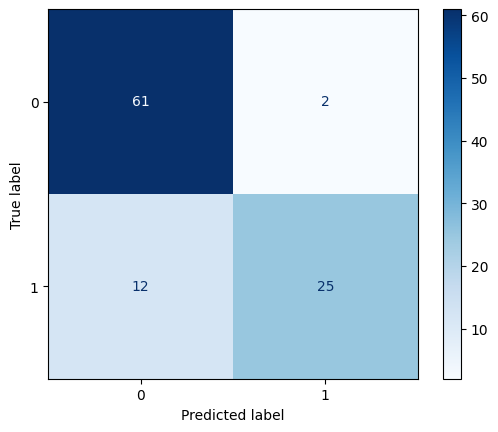

SVM Linear accuracy: 0.8600


In [74]:
svc_linear  = SVC(kernel='linear', random_state=RANDOM_STATE)
svc_poly    = SVC(kernel='poly',   random_state=RANDOM_STATE)
svc_sigmoid = SVC(kernel='sigmoid',random_state=RANDOM_STATE)
svc_rbf     = SVC(kernel='rbf',    random_state=RANDOM_STATE)

svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_sigmoid.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

plot_confusion_matrix(y_test, svc_linear.predict(X_test), svc_linear.classes_, 'SVM Linear')

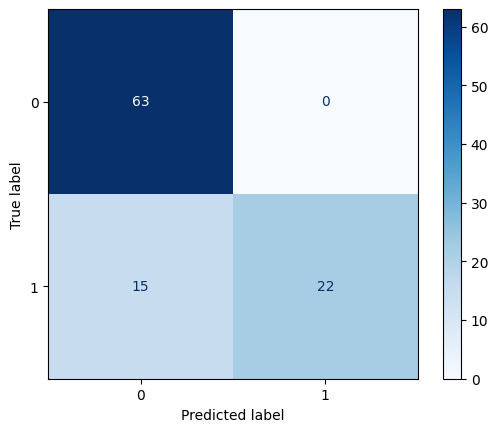

SVM Poly accuracy: 0.8500


In [75]:
plot_confusion_matrix(y_test, svc_poly.predict(X_test), svc_poly.classes_, 'SVM Poly')

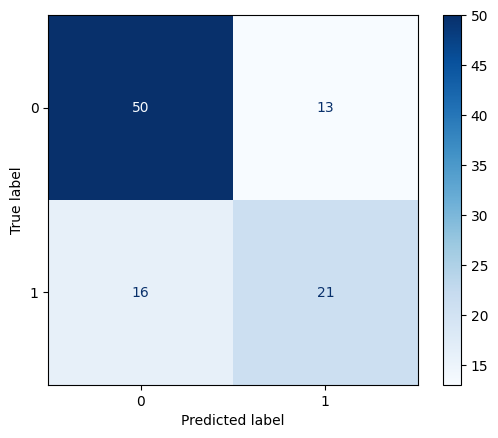

SVM Sigmoid accuracy: 0.7100


In [76]:
plot_confusion_matrix(y_test, svc_sigmoid.predict(X_test), svc_sigmoid.classes_, 'SVM Sigmoid')

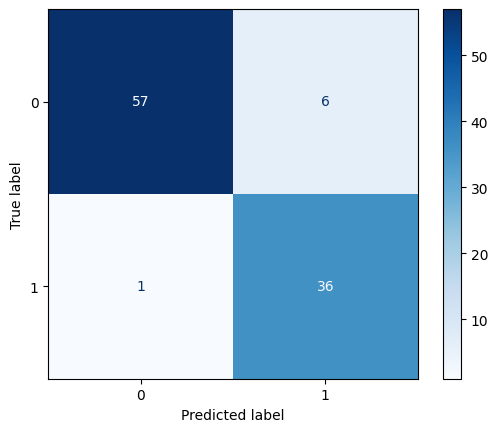

SVM RBF accuracy: 0.9300


In [77]:
plot_confusion_matrix(y_test, svc_rbf.predict(X_test), svc_rbf.classes_, 'SVM RBF')

In [78]:
clfs = [svc_linear, svc_poly, svc_sigmoid, svc_rbf]
titles = [
    'SVM - Linear (Train Set)',
    'SVM - Poly (Train Set)',
    'SVM - Sigmoid (Train Set)',
    'SVM - RBF (Train Set)'
]

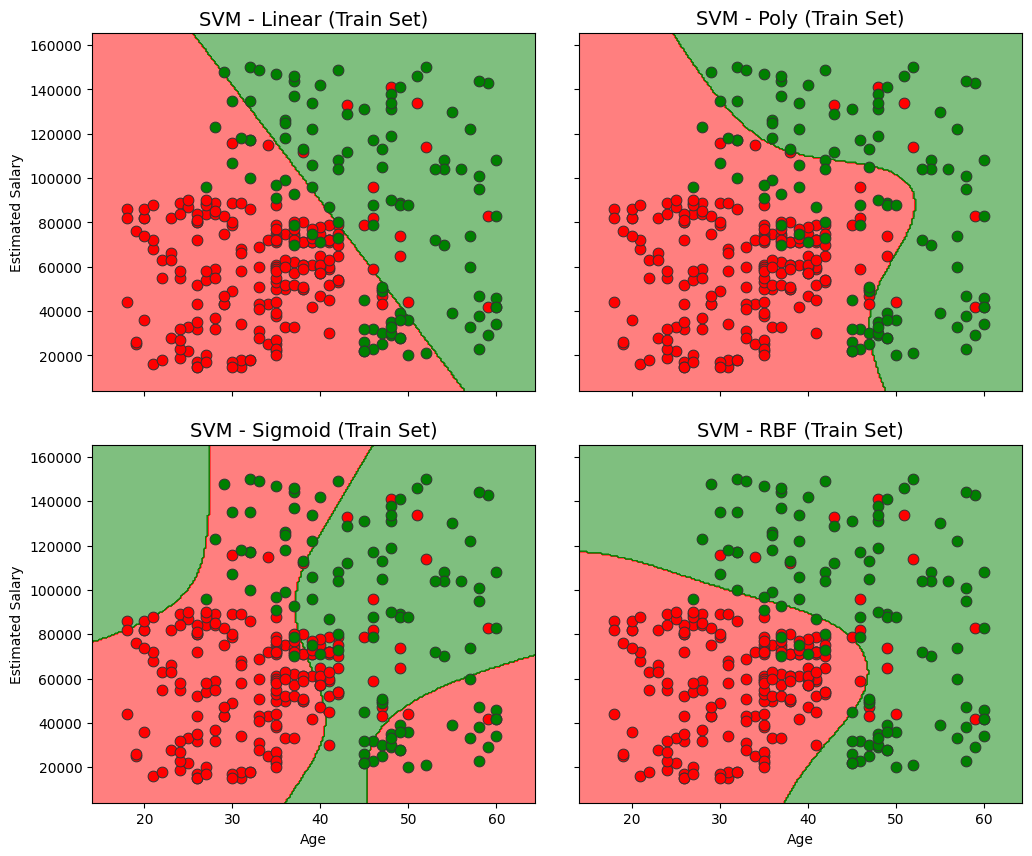

CPU times: total: 938 ms
Wall time: 1.21 s


In [79]:
%%time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, clf, title in zip(axes.flat, clfs, titles):
    plot_boundary(clf, X_train, y_train, scaler, title, ax=ax, step=0.02)
    ax.label_outer()

plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.show()

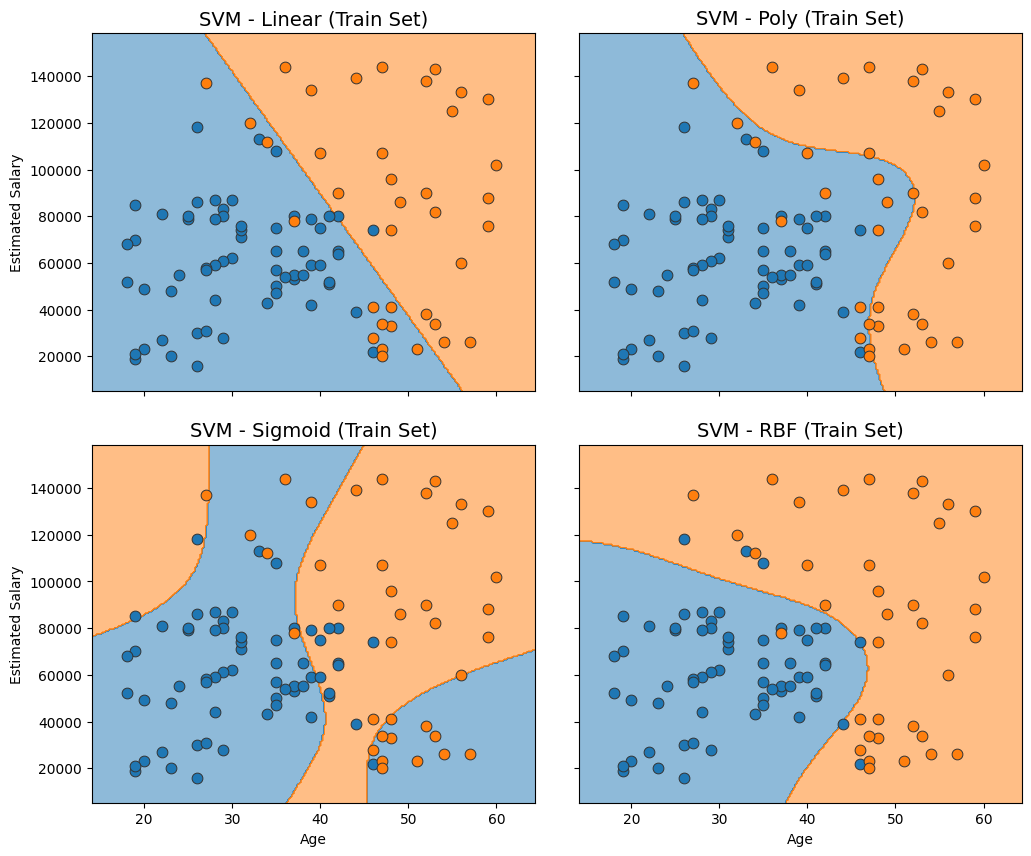

CPU times: total: 953 ms
Wall time: 1.16 s


In [80]:
%%time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, clf, title in zip(axes.flat, clfs, titles):
    plot_boundary(clf, X_test, y_test, scaler, title, ax=ax, step=0.02, c='test')
    ax.label_outer()

plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.show()

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [82]:
logistic_clf = LogisticRegression(random_state=RANDOM_STATE)
dt_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
rf_clf = RandomForestClassifier(random_state=RANDOM_STATE)
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
svc_rbf = SVC(kernel='rbf', random_state=RANDOM_STATE)

In [83]:
logistic_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

print('Training Done')

Training Done


In [84]:
clfs = [logistic_clf, dt_clf, rf_clf, knn_clf, xgb_clf, svc_rbf]
titles = [
    f"Logistic Regression (Test set)",
    f"Decision Tree (Test set)",
    f"Random Forest (Test set)",
    f"K-NN (Test set)",
    f"XGBoost (Test set)",
    f"SVM - RBF (Train Set)"
]

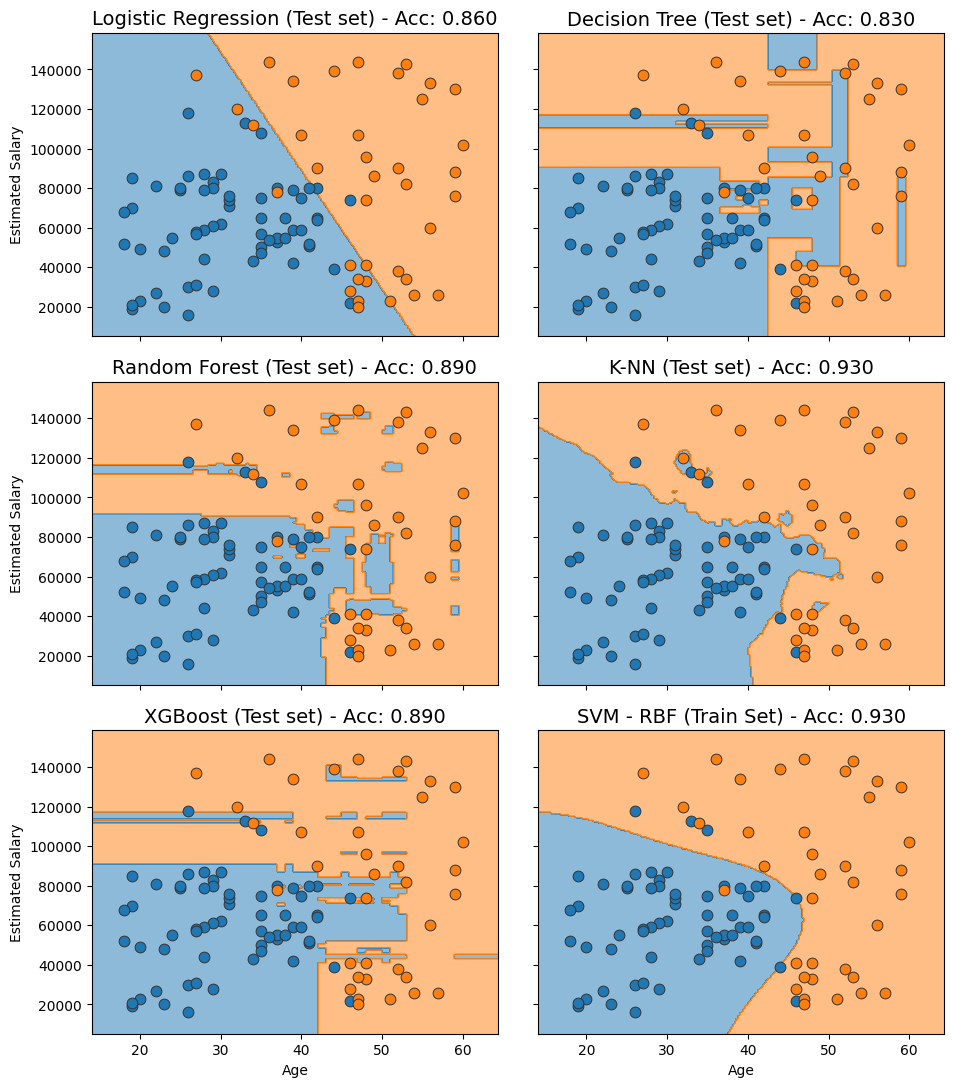

CPU times: total: 4.94 s
Wall time: 2.88 s


In [85]:
%%time
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 13))

for ax, clf, title in zip(axes.flat, clfs, titles):
    title += f" - Acc: {accuracy_score(y_test, clf.predict(X_test)):.3f}"
    plot_boundary(clf, X_test, y_test, scaler, title, ax=ax, step=0.02, c='test')
    ax.label_outer()

plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.show()

# III. Învățarea nesupervizată

## 1. Clusterizare

## K-Means

### Teorie

* Algoritmul de clusterizare K-Means este o metodă de învățare nesupervizată folosită pentru rezolvarea problemelor de clusterizare.


* K-means este un algoritm ce se bazează pe conceptul de centroid. Un centroid este un punct central într-un set de date sau într-un cluster. În K-Means, este media punctelor dintr-un cluster, utilizată pentru a defini poziția acestuia.


* În cadrul algorimului K-means calculăm distanța dintre fiecare punct și un centroid pentru a-l atribui unui cluster (cel mai apropiat centroid denotă cluster-ul din care punctul aparține).


* Este un proces iterativ de atribuire a fiecărui punct de date către grupuri și, încet, punctele de date sunt grupate pe baza unor caracteristici similare. Obiectivul este de a minimiza suma distanțelor dintre punctele de date și centroidul clusterului, pentru a identifica grupul corect căruia ar trebui să aparțină fiecare punct de date.

1. **Alegerea numărului de clustere**
* Primul pas este definirea numărului ${K}$ de clustere în care vom grupa datele. Spre exemplu, să alegem ${K=3}$


2. **Inițializarea centroizilor**
* Centroidul este centrul unui cluster, dar inițial, centrul exact al punctelor de date va fi necunoscut, așa că selectăm puncte de date aleatorii și le definim ca centroizi pentru fiecare cluster. Vom inițializa 3 centroizi în setul de date.

<center>
<div style="background-color: white; padding: 10px">
  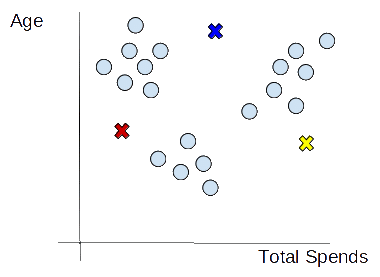
  </div>
</center>

3. **Atribuirea punctelor celui mai apropiat cluster**

* Odată definiți centroizii inițiali, următorul pas este de a asigna fiecărui punct din setul de date cluster-ul din care aparține. Un punct aparține cluster-ului $k$ dacă centroidul cu indicele $k$ este cel mai apropiat (conform măsurii de distanță).

<center>
<div style="background-color: white; padding: 10px;">
    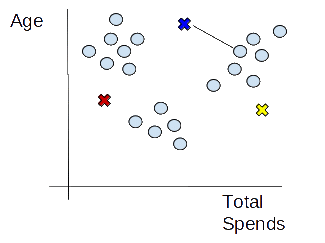
</div>
</center>


```math
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
```

4. **Actualizarea centroizilor**
* În continuare, următoarea poziție a centroizilor este dată de media punctelor ce se află în cluster-ul indicat de fiecare centroid.

<center>
<div style="background-color: white; padding: 10px;">
    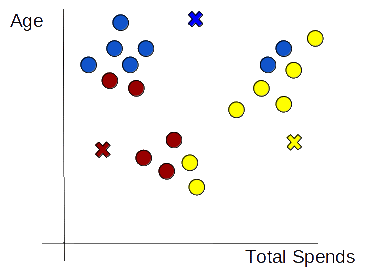
</div>
</center>

5. **Repetare până la convergență**
* Pașii 3 și 4 sunt repetați fie până când pozițiile acestora nu se mai schimbă, fie până când asignarea punctelor în clustere rămâne identică între iterații.

<center>
<div style="background-color: white; padding: 10px;">
    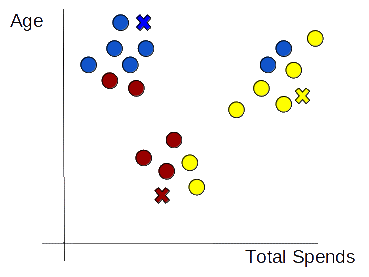
</div>
</center>

<center>
<div style="background-color: white; padding: 10px;">
    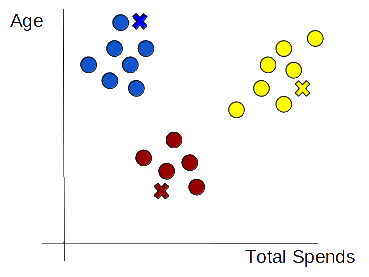
</div>
</center>

* **OBS.** Este foarte importantă alegerea unui număr potrivit de clustere la începutul rulării algoritmului K-Means.

* Mai multe explicatii gasiti aici:
  * https://www.youtube.com/watch?v=_aWzGGNrcic

**Avantaje**
- Destul de simplu de implementat.
- Scalează și pentru seturi de date mari.
- Convergență garantată.
- Generalizează la clustere cu diferite proprietăți (forme, mărimi)

**Dezavantaje**
- Performanța depinde foarte mult de alegerea numărului de clustere și de inițializarea centroizilor.
- Sensibil la outlieri.

In [86]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [87]:
df = pd.read_csv('Mall_Customers.csv'); df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
X = df.iloc[:, [3, 4]].values
k_values = range(2, 11)

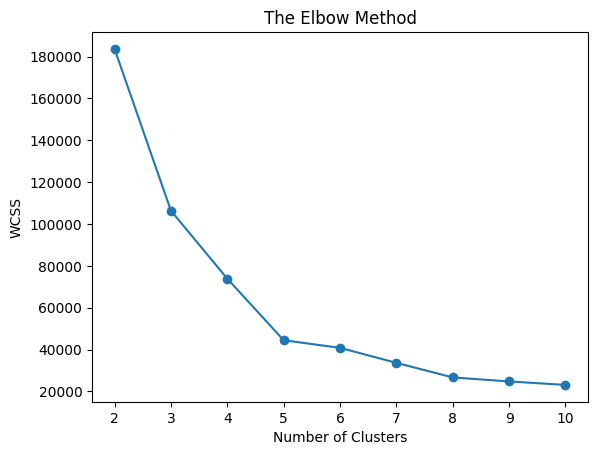

In [89]:
wcss = []
for i in k_values:
    # kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

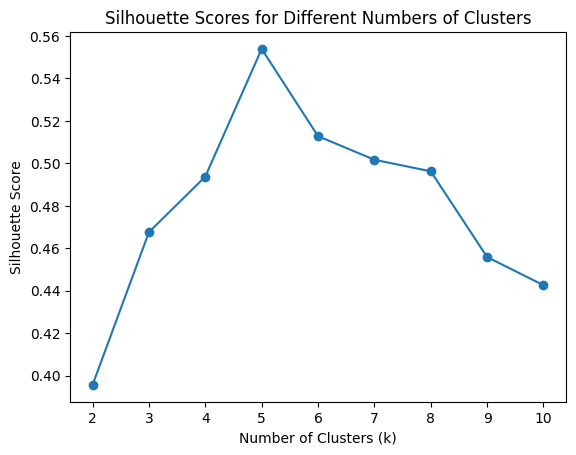

In [91]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [92]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

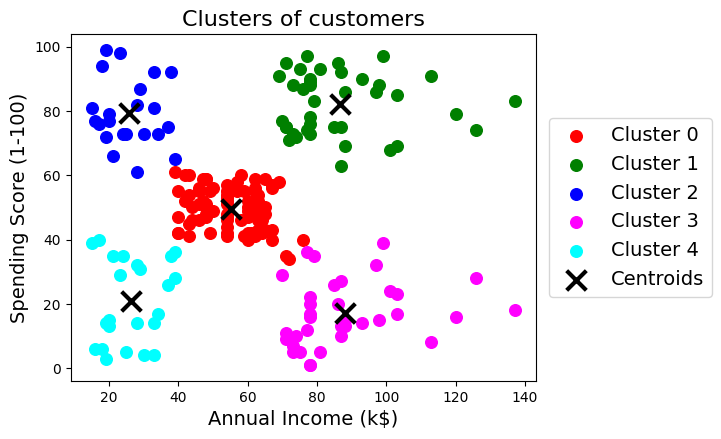

In [93]:
plt.figure(figsize=(6, 4.5))
colors = ['red', 'green', 'blue', 'magenta', 'cyan']

for cluster_idx in range(n_clusters):
    plt.scatter(X[y_pred==cluster_idx, 0], X[y_pred==cluster_idx, 1], s=70,
                c=colors[cluster_idx], label=f"Cluster {cluster_idx}")

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='black', label='Centroids', marker='x', lw=3)

plt.title('Clusters of customers', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(fontsize=14, loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

<br>

# IV. Exerciții

## [40p] Exercițiul 1 - CLASIFICARE. Rezolvați setul de date Iris urmărind pașii de mai jos:

### **Task 1** - Importul bibliotecilor

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

### **Task 2** - Încărcarea setului de date

In [95]:
df = pd.read_csv('Iris.csv')

display(df.describe())
display(df.info())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

### **Task 3** - Împărțirea setului de date în setul de antrenare și testare

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

### **Task 4** - Procesarea datelor

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Task 5** - Antrenarea a cel puțin 3 modele studiate în laborator

In [98]:
xgb_clf = XGBClassifier(random_state=RANDOM_STATE)
svc_clf = SVC(kernel='rbf', random_state=RANDOM_STATE)
lg_clf = LogisticRegression(random_state=RANDOM_STATE)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                                max_features='sqrt', random_state=RANDOM_STATE)

xgb_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
lg_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

print('Training Done')

Training Done


### **Task 6** - Evaluarea modelelor atât pe setul de antrenare cât și pe setul de test (folosind cel puțin acuratețea ca metrică de evaluare)

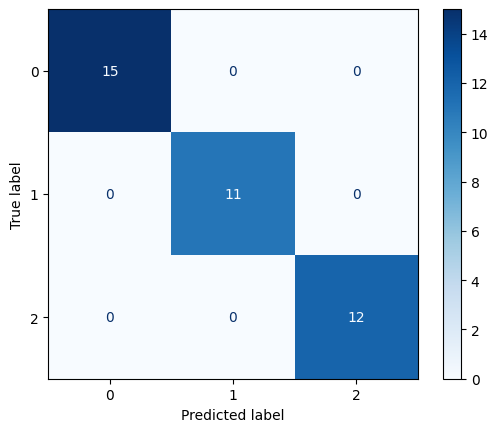

XGBoost accuracy: 1.0000


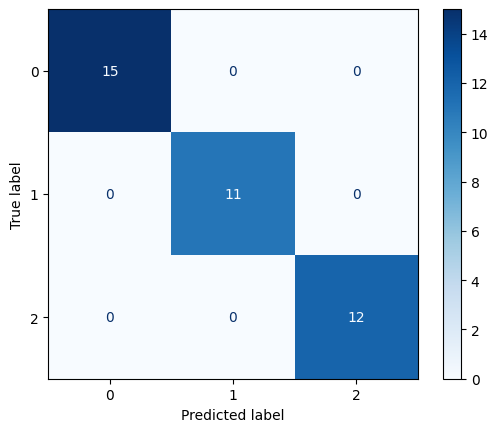

SVM accuracy: 1.0000


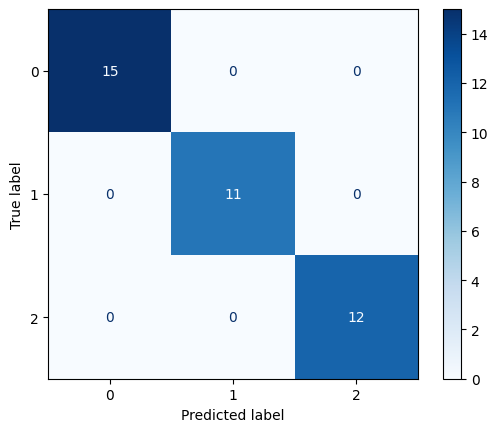

Logistic Regression accuracy: 1.0000


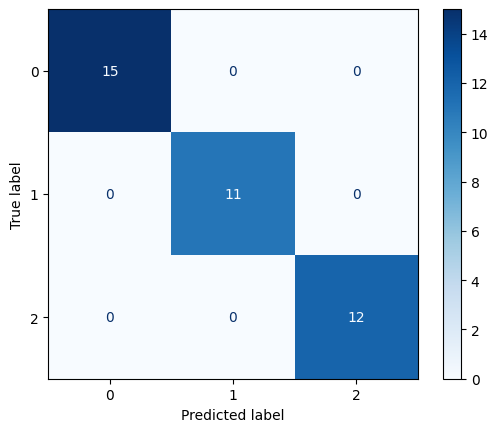

Random Forest accuracy: 1.0000


In [99]:
plot_confusion_matrix(y_test, xgb_clf.predict(X_test), xgb_clf.classes_, 'XGBoost')
plot_confusion_matrix(y_test, svc_clf.predict(X_test), svc_clf.classes_, 'SVM')
plot_confusion_matrix(y_test, lg_clf.predict(X_test), lg_clf.classes_, 'Logistic Regression')
plot_confusion_matrix(y_test, rf_clf.predict(X_test), rf_clf.classes_, 'Random Forest')

<br>

## [40p] Exercițiul 2 - CLUSTERIZARE. Rezolvați setul de date Iris urmărind pașii de mai jos:

### **Task 1** - Importul bibliotecilor

In [100]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


### **Task 2** - Încărcarea setului de date

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('Iris.csv')

display(df.head())

species = df['Species'].unique()
print(species)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### **Task 3** - Procesarea datelor

In [102]:
X = df.values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

### **Task 4** - Aflarea numărului potrivit de centroizi

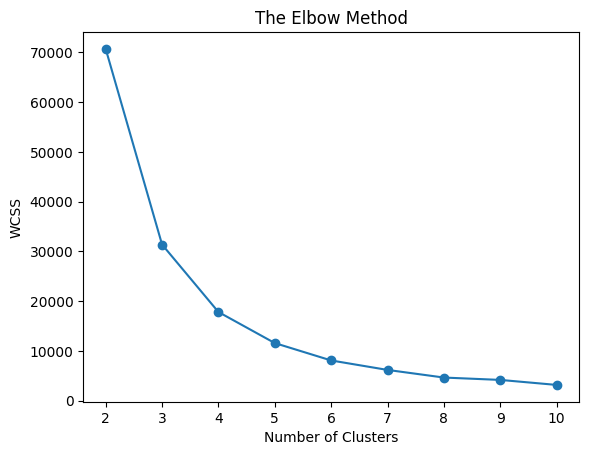

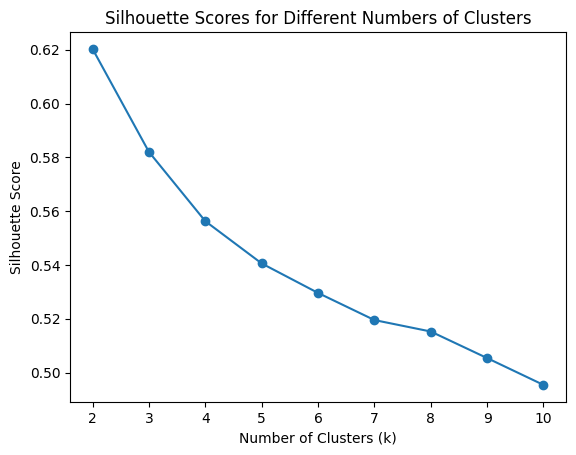

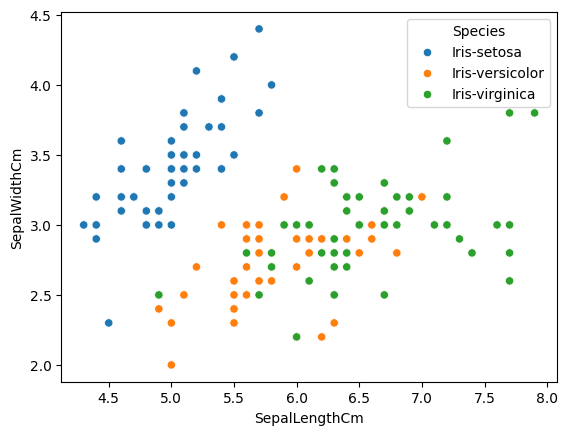

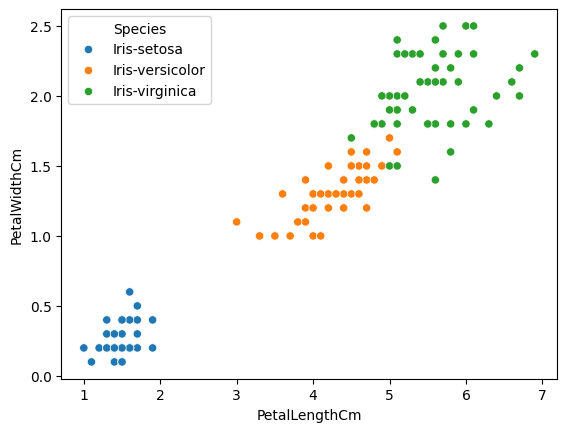

In [103]:
k_values = range(2, 11)

wcss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])
plt.show()

sns.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df['Species'])
plt.show()

### **Task 5** - Rularea algoritmului K-Means

In [104]:
k = 3

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

### **Task 6** - Afișarea clusterelor (rezultatelor)

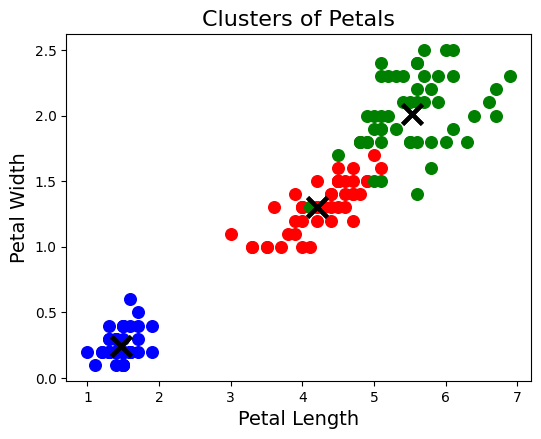

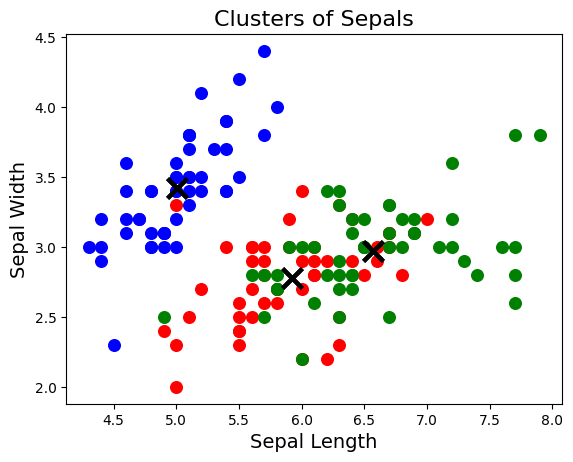

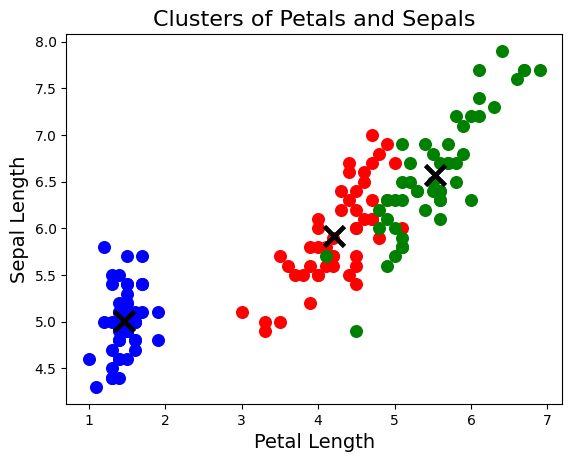

In [105]:
plt.figure(figsize=(6, 4.5))
colors = ['red', 'green' , 'blue']

def plot_clusters(X, y_pred, kmeans, k, index_x, index_y, xlabel, ylabel, title):
    for cluster_idx in range(k):
        plt.scatter(X[y_pred==cluster_idx, index_x], X[y_pred==cluster_idx, index_y], s=70,
                    c=colors[cluster_idx])


    for cluster_idx in range(k):
        plt.scatter(kmeans.cluster_centers_[:, index_x],
                    kmeans.cluster_centers_[:, index_y],
                    s=200, c='black', label='Centroids', marker='x', lw=3)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.show()


plot_clusters(X, y_pred, kmeans, k, -2, -1, 'Petal Length', 'Petal Width', 'Clusters of Petals')
plot_clusters(X, y_pred, kmeans, k, -4, -3, 'Sepal Length', 'Sepal Width', 'Clusters of Sepals')
plot_clusters(X, y_pred, kmeans, k, -2, -4, 'Petal Length', 'Sepal Length', 'Clusters of Petals and Sepals')

<br>

## [20p] Exercițiul 3 -  Optimizare clasificare Iris.
### Încercați să îmbunătățiti scorurile obținute pentru clasificatoarele antrenate anterior.

Sugestii:
- Optimizarea hiperparametrilor.
- Propriul model ensemble (combinarea mai multor modele pentru predicția finală).
- Feature engineering.
- Analiza datelor.

In [106]:
# Nothing to improve here

##  Referințe

* https://www.v7labs.com/blog/data-preprocessing-guide


* https://www.udemy.com/share/101WfW3@krZjamWkwvlj0alClx3HyZsRrb7vU2vDRTkupsn5cw4FuWgSGNy6TZVxud671KuB/


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fomdena.com%2Fwp-content%2Fuploads%2F2022%2F03%2FFig-2-Decision-Tree-and-Decision-Regions.png&imgrefurl=https%3A%2F%2Fomdena.com%2Fblog%2Fdecision-tree-based-algorithms%2F&tbnid=xYUtCr9qD2BZhM&vet=12ahUKEwiOqcP4rsb5AhUDMuwKHVtmBtEQMygWegUIARDnAQ..i&docid=9XbYmBLnUbNvuM&w=1455&h=472&q=decision%20tree%20example%20ml%20a-z&ved=2ahUKEwiOqcP4rsb5AhUDMuwKHVtmBtEQMygWegUIARDnAQ


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F1*jnm58RnbcicWETrDJNLQzQ.jpeg&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Fimproving-the-performance-of-machine-learning-model-using-bagging-534cf4a076a7&tbnid=62ObwawI6GM1yM&vet=10CD4QMyiGAWoXChMI8O3507DG-QIVAAAAAB0AAAAAEAI..i&docid=4BlDKCubJFOt-M&w=1024&h=768&q=bootstrapping%20vs%20bagging%20random%20forest%20example&ved=0CD4QMyiGAWoXChMI8O3507DG-QIVAAAAAB0AAAAAEAI


*  https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F640%2F0*gKOV65tvGfY8SMem.png&imgrefurl=https%3A%2F%2Fodsc.medium.com%2Flogistic-regression-with-python-ede39f8573c7&tbnid=HPjx8FSDExGrmM&vet=12ahUKEwj13YuAkNH5AhVP86QKHQ3AAKAQMygDegUIARDAAQ..i&docid=hZQfNSq4-4FKmM&w=640&h=300&q=Logistic%20Regression&ved=2ahUKEwj13YuAkNH5AhVP86QKHQ3AAKAQMygDegUIARDAAQ


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fuploads%2F20201211181531%2FCapture.JPG&imgrefurl=https%3A%2F%2Fwww.geeksforgeeks.org%2Fsupport-vector-machine-algorithm%2F&tbnid=stD2m17xvq-lFM&vet=12ahUKEwjimt_TkNH5AhU3wwIHHSzAA3cQMygvegUIARCiAg..i&docid=_rfZrOATlhFQGM&w=403&h=325&q=support%20vector%20machine&ved=2ahUKEwjimt_TkNH5AhU3wwIHHSzAA3cQMygvegUIARCiAg


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1200%2F1*zTgGBTQIMlASWm5QuS2UpA.jpeg&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Fensemble-learning-bagging-boosting-3098079e5422&tbnid=FndpQW1FXmNNEM&vet=12ahUKEwjj06fxkNH5AhXMuKQKHWkoCqUQMygCegUIARC8AQ..i&docid=B05yHK5BhKZetM&w=1200&h=675&q=bagging%20and%20boosting&ved=2ahUKEwjj06fxkNH5AhXMuKQKHWkoCqUQMygCegUIARC8AQ


* https://www.geeksforgeeks.org/xgboost/


* https://www.google.com/imgres?imgurl=https%3A%2F%2Feditor.analyticsvidhya.com%2Fuploads%2F24015Random%2BForest.jpg&imgrefurl=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2021%2F06%2Funderstanding-random-forest%2F&tbnid=S0M849pjuSYV5M&vet=12ahUKEwjA2ae0kdH5AhX_wwIHHfYsAKUQMygoegUIARCSAg..i&docid=iMm29XP5LQdhwM&w=846&h=430&q=randomn%20forest%20example&ved=2ahUKEwjA2ae0kdH5AhX_wwIHHfYsAKUQMygoegUIARCSAg


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1370%2F0*g3xZsAFWEo4FpMG3.png&imgrefurl=https%3A%2F%2Fmedium.com%2F%40jwbtmf%2Fxgboost-extreme-gradient-boosting-in-machine-learning-3427b937b35c%3Fsource%3Dtopics_v2---------8-84--------------------c1239333_be8b_4aa2_a765_23fdfe945729-------19&tbnid=9ue3AoVrlGJR7M&vet=12ahUKEwjQ3_jakdH5AhVVNuwKHdeFAqoQMygMegUIARDXAQ..i&docid=9dVvy6fZOsYGAM&w=685&h=364&q=xgboost&ved=2ahUKEwjQ3_jakdH5AhVVNuwKHdeFAqoQMygMegUIARDXAQ


* https://www.google.com/imgres?imgurl=https%3A%2F%2Fi0.wp.com%2Fneptune.ai%2Fwp-content%2Fuploads%2FK-Means-Clustering_4.gif&imgrefurl=https%3A%2F%2Fneptune.ai%2Fblog%2Fk-means-clustering&tbnid=HeaYvTRMjxU_AM&vet=10CAMQxiAoAGoXChMI8MzepJXR-QIVAAAAAB0AAAAAEAY..i&docid=9yAIspV3SK4jSM&w=369&h=277&itg=1&q=k-means%20explained&ved=0CAMQxiAoAGoXChMI8MzepJXR-QIVAAAAAB0AAAAAEAY
